# 航空宇宙情報システム学第二： 5月9日課題 (HW2023-01)

今回は少しだけ航空宇宙工学科らしい題材を扱ってみようと思います。今日、機械学習の研究者や学習者が利用するための様々なデータセットを集めたポータルサイトが多数ありますが、その先駆けというか老舗の一つが、[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) です。

このサイトでは、600以上の手頃なデータセットが提供されていて、その中の一つに、[Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise) というデータセットがあります。詳細は元ページの説明を読んでもらいたいのですが、要約すると、<font color="blue"> NACA0012翼型について、条件を色々と変えて風洞実験を行ったときに計測したノイズレベルを記録したデータ</font>です。

このNACA0012翼型とそのノイズ計測データセットを題材として、以下の課題内容に取り組んでください。

ファイル名は、HW2023-02.ipynb のまま提出して構いません。

提出期限は、<font color='red'>2週間後の5月23日8時30分 (次々回授業の直前) </font>とします。


In [ ]:
# とりあえず、NumPy, Matplotlib, Pandas などをインポート
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

## (1) NACA0012の形状

[NASAのサイト内の情報](https://turbmodels.larc.nasa.gov/naca0012_val.html)によれば、翼型NACA0012のオリジナルの定義は、関数
$$
y = 0.6 \cdot \left( 0.2969 \cdot \sqrt{x} - 0.1260 \cdot x -0.3516 \cdot x^2 + 0.2843 \cdot x^3 - 0.1015 \cdot x^4 \right)
$$
と、これを$x$について反転した関数とで、$x=0$から$x=1.008930411365$の間で囲まれた形（つまり対称形）となっているそうです。
この定義に従って、Matplotlibの`plot`関数等を使って（迎角0度での）形状を描いてください。

**(ヒント)** 普通にx座標、y座標の集合を`plot()`関数に渡して描くと、縦軸横軸が独立して自動スケーリングされてしまい、縦横比がおかしくなってしまいます。
そのようなときは、
```
plt.axis("scaled")
```
という一文を`plot()`関数の後に入れてあげると、縦軸・横軸で同じスケーリングになります。


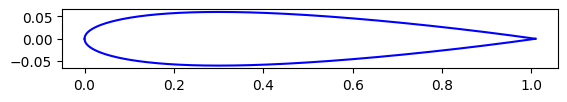

In [ ]:
def shape(x):
  y = 0.6*(0.2969*np.sqrt(x) - 0.1260*x - 0.3516*x**2 + 0.2843*x**3 - 0.1015*x**4)
  return y

xlst = np.linspace(0,1.008930411365,1000)
ylst1 = []
ylst2 = []
for x in xlst:
  y = shape(x)
  ylst1.append(y)
  ylst2.append(-y)

fig, ax = plt.subplots()
ax.plot(xlst, ylst1, color = 'b')
ax.plot(xlst, ylst2, color = 'b')

plt.axis('scaled')
plt.show()

___

## (2) 迎角を与えたときの見え方

上で描いたNACA0012翼型について、迎角を15.6度に設定したときの断面形状（というか見え方）を描いてください。

**(ヒント)** NumPyのarray型として回転行列を作成して、翼の輪郭上の点を一括して回転させると良いと思います。

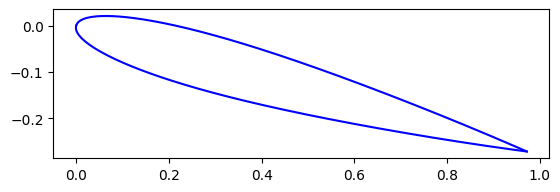

In [ ]:
def roll(v_array,theta): #thetaはラジアン表記
  Roll = np.array(
          [[np.cos(theta), -np.sin(theta)],
           [np.sin(theta), np.cos(theta)]]
           )
  v_array = np.dot(Roll, v_array)
  return v_array

v1_array = np.array(
    [xlst,
     ylst1]
)
v2_array = np.array(
    [xlst,
     ylst2]
)

v1_rolled = roll(v1_array, -15.6*np.pi/180)
v2_rolled = roll(v2_array, -15.6*np.pi/180)

fig, ax = plt.subplots()
ax.plot(v1_rolled[0],v1_rolled[1], color = 'b')
ax.plot(v2_rolled[0], v2_rolled[1], color = 'b')

ax.axis('scaled')
plt.show()

____

## (3) ノイズ計測データのデータフレームへの読み込み

このデータセットのオリジナルは、UCIのサイトから[直接ダウンロード](https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat)できます。このデータファイルはテキストファイルなので、メモ帳やテキストエディット等のテキストエディタで中を見ることができます。しかし、このオリジナルデータは、(CSVではなく)タブ区切りとなっており、また、ヘッダー行が無いため、`read_csv()`関数の代わりに`read_table()`関数を使い、さらに、オプションの引数として`header=None`を与える必要があります。
* (注) `read_csv()`関数の中で区切り文字をタブに設定して読み込むこともできます。

少し探してみたところ、Kaggleのサイトで、[ヘッダーを追加し、かつ、カンマ区切りに変換したファイル](https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset?resource=download)がありました。ただし、Kaggleにユーザー登録してログインする必要があるので、当該ファイルを当授業のサイトからもダウンロードできるようにしておきます（ライセンス的には問題ないはず）。

**本題ですが、このデータをPandasのデータフレームに読み込んだ後、`describe()`メソッドを実行して、全6変数（5つの説明変数と1つの目標変数）の基本統計情報を表示させてください。**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AirfoilSelfNoise.csv')
df

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


___

## (4) 変数間の相関の計算と散布図の描画

全6変数の間の相関係数を計算してください。また5つの説明変数と1つの目標変数との関係を示すような散布図をMatplotlibを使って表示させてください。

In [ ]:
def corr(x_array, y_array): #相関係数の計算
  mx,my = np.mean(x_array),np.mean(y_array)
  xc,yc = x_array - mx, y_array - my
  r = np.sum(xc*yc)/np.sqrt(np.sum(xc**2)*np.sum(yc**2))
  return r

In [ ]:
collst = ['f', 'alpha', 'c', 'U_infinity', 'delta','SSPL']
idlst = ['f', 'alpha', 'c', 'U_infinity', 'delta','SSPL']
Corr = pd.DataFrame(columns=collst, index=idlst)

for col in collst:
  for id in idlst:
    # if id == col:
    #   continue
    Corr[col][id] = corr(df[col].values, df[id].values)

Corr

,f,alpha,c,U_infinity,delta,SSPL
f,1.0,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
alpha,-0.272765,1.0,-0.504868,0.05876,0.753394,-0.156108
c,-0.003661,-0.504868,1.0,0.003787,-0.220842,-0.236162
U_infinity,0.133664,0.05876,0.003787,1.0,-0.003974,0.125103
delta,-0.230107,0.753394,-0.220842,-0.003974,1.0,-0.31267
SSPL,-0.390711,-0.156108,-0.236162,0.125103,-0.31267,1.0


numpyのベクトルの内積とノルムを用いる場合

numpyの機能を用いる場合

pandasの機能を用いる場合

散布図

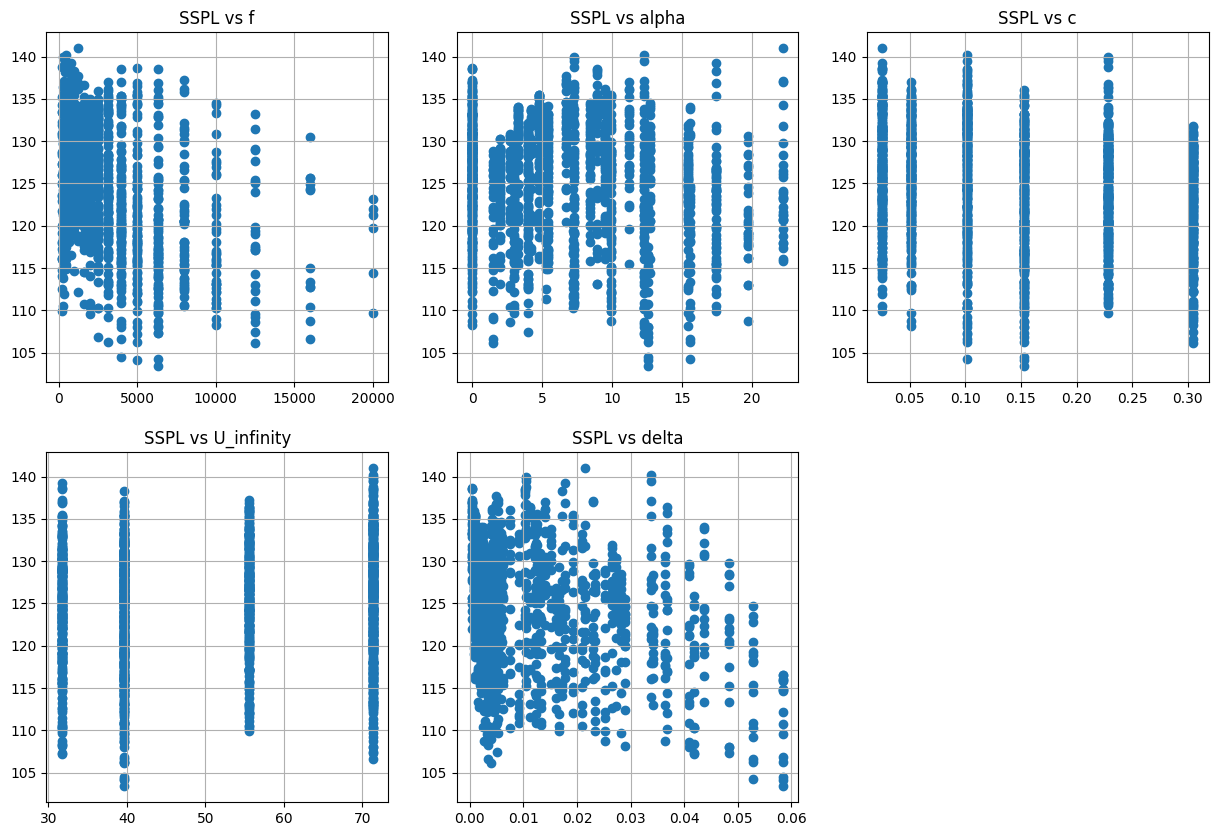

In [ ]:
SSPL = df['SSPL']
header = df.columns

fig = plt.figure(figsize = (15,10))
for i in range(5):
    ax = fig.add_subplot(2,3,i+1)
    ax.scatter(df[header[i]], SSPL)
    ax.set_title('SSPL vs {}'.format(header[i]))
    ax.grid()

plt.show()

In [ ]:
# df[(df['f'] == df['f'][1500]) & (df['c'] == df['c'][1500]) & (df['U_infinity'] == df['U_infinity'][1500]) & (df['delta'] == df['delta'][1500])]

In [ ]:
# target = df['SSPL']
# header = df.columns


# fig = plt.figure(figsize = (15,10))
# for i in range(5):
#     ax = fig.add_subplot(2,3,i+1)
#     name = ['f', 'alpha', 'c', 'U_infinity', 'delta','SSPL']
#     name.remove(header[i])
#     df2 = df[(df[name[0]] == df[name[0]][0]) & (df[name[1]] == df[name[1]][0]) & (df[name[2]] == df[name[2]][0]) & (df[name[3]] == df[name[3]][0])]
#     ax.scatter(df2[header[i]], df2['SSPL'])
#     ax.set_title('SSPL vs {}'.format(header[i]))
#     ax.grid()

# plt.show()

___

## (5) 説明変数の標準化

5つの説明変数は物理単位・次元、値の範囲もばらばらで、そのまま線形回帰を行うのは数値計算上好ましくありません。平均0,標準偏差1となるように各変数を標準化してください。

**(ヒント)** PandasのデータフレームでもNumPyのarray型でも標準化は可能です。


In [ ]:
def stdize(x, mean, std):
  x_s = (x - mean)/std
  return x_s

In [ ]:
df_s = df.copy()
for col in df.columns:
  df_s[col] = stdize(df[col], df.describe()[col]['mean'], df.describe()[col]['std'])

df_s

,f,alpha,c,U_infinity,delta,SSPL
0,-0.661802,-1.146021,1.798701,1.312498,-0.644590,0.197873
1,-0.598362,-1.146021,1.798701,1.312498,-0.644590,0.052917
2,-0.519062,-1.146021,1.798701,1.312498,-0.644590,0.161634
3,-0.408041,-1.146021,1.798701,1.312498,-0.644590,0.399361
4,-0.281161,-1.146021,1.798701,1.312498,-0.644590,0.380517
...,...,...,...,...,...,...
1498,-0.122560,1.489947,-0.373615,-0.723104,3.171717,-2.112287
1499,0.083620,1.489947,-0.373615,-0.723104,3.171717,-2.258692
1500,0.353241,1.489947,-0.373615,-0.723104,3.171717,-2.642825
1501,0.670443,1.489947,-0.373615,-0.723104,3.171717,-2.697908


numpyを用いた場合

pandasを用いた場合

___

## (6) 最小二乗法による重回帰モデルの推定

標準化された説明変数$x_j$に対して、目標変数であるノイズレベル$y$を予測するモデル、
$$
y = a_0 + \sum_{j=1}^5 a_j \cdot x_j + \epsilon
$$
のパラメータ$a_0,a_1,\cdots,a_5$ を最小二乗法によって求めてください。

In [ ]:
# ターゲット変数のデータ をベクトル y に
y = df['SSPL'].values
# サンプルの数
n = len(y)
# 説明変数のデータに値1の列を付け足したものを行列Xに
collst.remove('SSPL')
X = np.hstack((np.ones((n,1)),df[collst].values))
# 最小二乗法で係数ベクトルを求める
alp = la.solve(np.dot(X.T,X),np.dot(X.T,y))
print('alpha = ',alp)

alpha =  [ 1.32833806e+02 -1.28220711e-03 -4.21911706e-01 -3.56880012e+01
  9.98540449e-02 -1.47300519e+02]


In [ ]:
a = np.dot(la.inv(np.dot(X.T,X)),np.dot(X.T,y))

___

## (7) 得られた重回帰モデルの評価

上で求めた重回帰モデルを使って説明変数から予測（再現）した目標変数の予測値$\hat{y}$と実際の目標変数の値$y_i$とがどの程度一致しているかを散布図を描くなどして確認してください。また、二乗平均平方根誤差(RMSE)を求めてください。

授業のノートブックでも触れましたが、RMSEは、
$$
\mbox{RMSE} = \sqrt{\frac{1}{n}\sum_{i=0}^{n-1} (y_i-\hat{y}_i)^2} = \sqrt{\frac{Q(\boldsymbol{\alpha})}{n}}
$$
で計算されます。

In [ ]:
def modelized(f, alpha, c, Ufin, delta):
  y_hat = a[0] + a[1]*f + a[2]*alpha + a[3]*c + a[4]*Ufin + a[5]*delta
  return y_hat

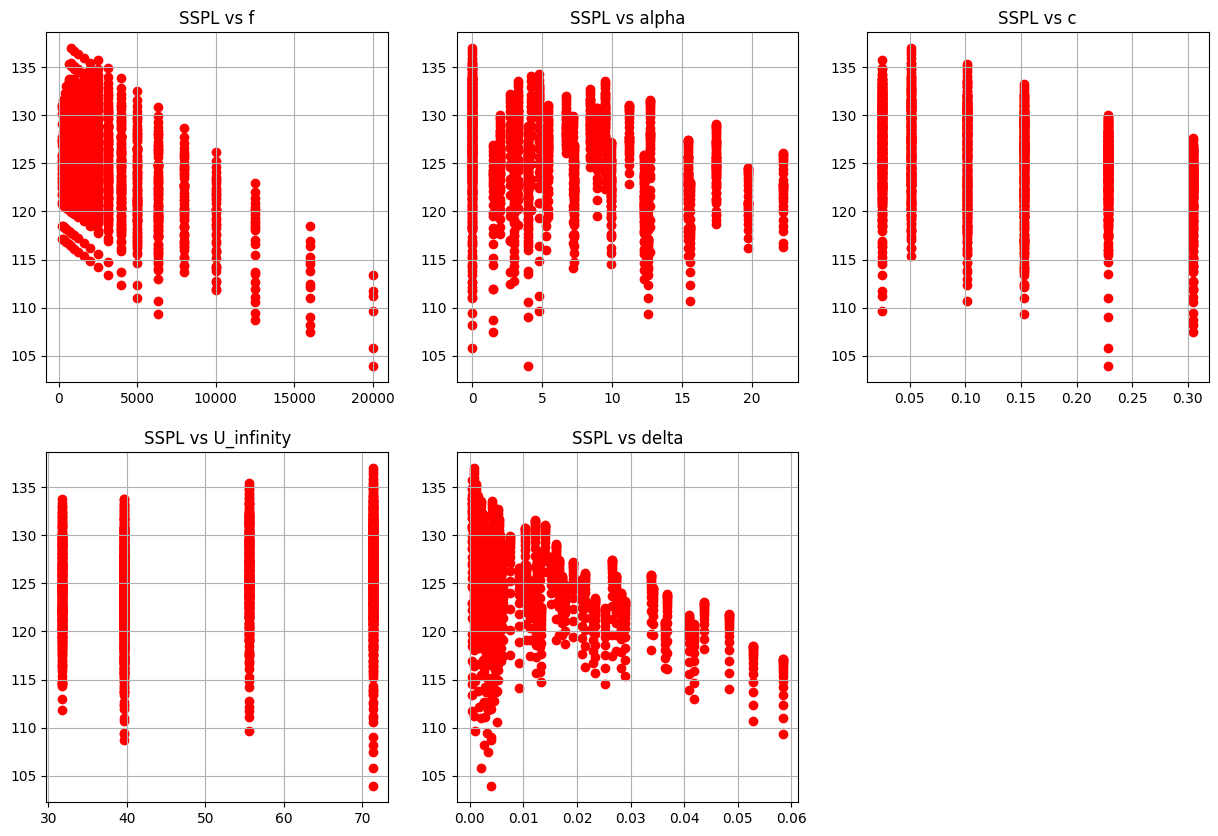

In [ ]:
SSPL_hat = []
for i in range(len(df['f'])):
  y_hat = modelized(df['f'][i], df['alpha'][i], df['c'][i], df['U_infinity'][i], df['delta'][i])
  SSPL_hat.append(y_hat)

target = SSPL_hat
header = df.columns

fig = plt.figure(figsize = (15,10))
for i in range(5):
    ax = fig.add_subplot(2,3,i+1)
    ax.scatter(df[header[i]], target, color = 'r')
    ax.set_title('SSPL vs {}'.format(header[i]))
    ax.grid()

plt.show()

In [ ]:
n = len(SSPL_hat)
Q = 0
for i in range(n):
  Q += (df['SSPL'][i] - SSPL_hat[i])**2
RMSE = np.sqrt(Q/n)
RMSE

4.799244446847058

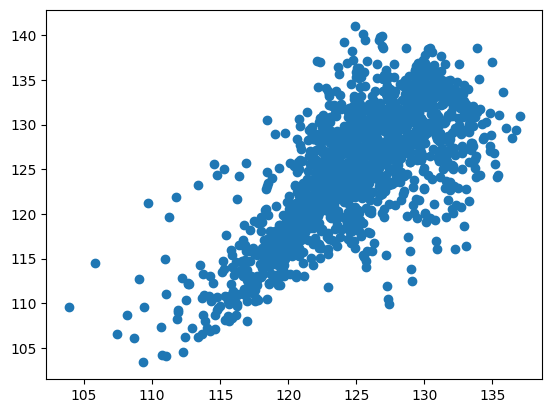

In [ ]:
plt.scatter(SSPL_hat, SSPL)
plt.show()